<a href="https://colab.research.google.com/github/MEK-0/Python_lib/blob/main/SupervisedLearnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kütüphaneleri ekleme

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Linear Regression (Doğrusal Regresyon)

Linear Regression, bağımlı bir değişken ile bir veya daha fazla bağımsız değişken arasındaki doğrusal ilişkiyi modelleyen istatistiksel bir tekniktir. Amaç, veriler arasındaki ilişkiyi açıklayan bir doğrusal denklem bulmak ve bu denklemle tahminler yapmaktır.

Basit Doğrusal Regresyon:
Sadece bir bağımsız değişken vardır.
Model:



## Çoklu Doğrusal Regresyon (Multiple Linear Regression)
Birden fazla bağımsız değişken içerir.
Model
y
=
w
0
+
w
1
x
1
+
w
2
x
2
+
⋯
+
w
n
x
n
+
ε


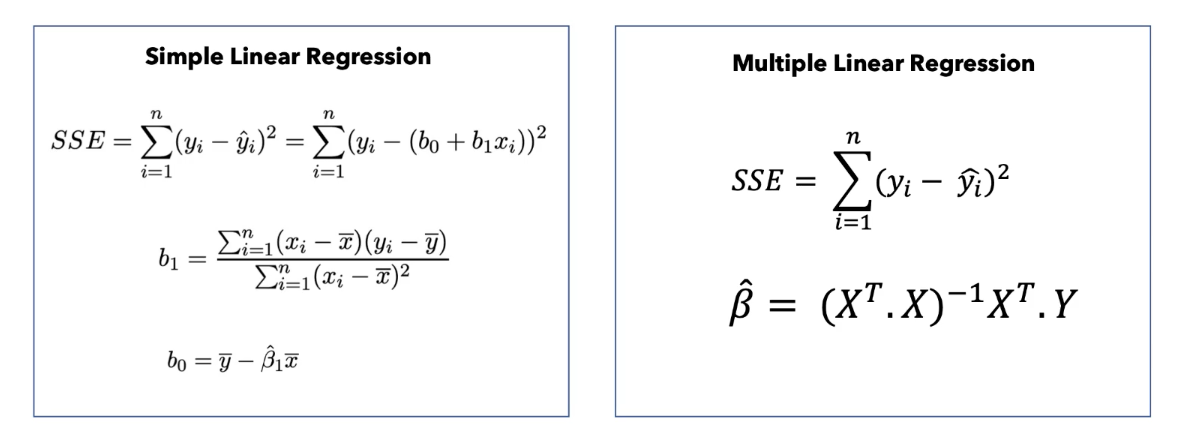

## Matematiksel Temel:
Linear Regression’in amacı, tahmin edilen değerler ile gerçek değerler arasındaki farkı (hata) minimize etmektir. Genelde kullanılan hata metriği Mean Squared Error (MSE)'dir:



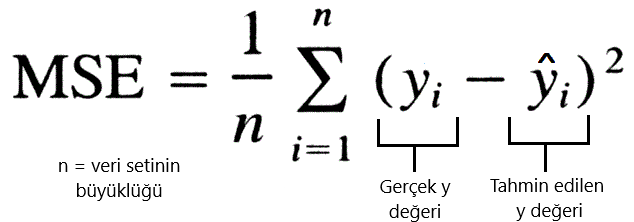

Eğim (w1): 0.60
Y-Kesişim (w0): 2.20
Ortalama Kare Hata (MSE): 0.48


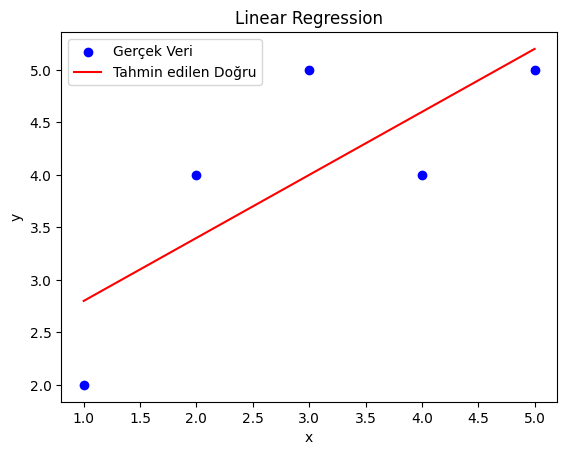

In [ ]:
# Örnek veri Oluşturma
x = np.array([1,2,3,4,5]).reshape(-1,1) # Girdi (Bağımsız değişken)
y = np.array([2,4,5,4,5])               # Çıktı (Bağımlı değişken)

#Model Oluşturma
model = LinearRegression()
model.fit(x,y)

#Tahmin yap
y_pred = model.predict(x)

#Katsayılar
print(f"Eğim (w1): {model.coef_[0]:.2f}")
print(f"Y-Kesişim (w0): {model.intercept_:.2f}")
print(f"Ortalama Kare Hata (MSE): {mean_squared_error(y, y_pred):.2f}")

#Görselleştirme
plt.scatter(x,y, color='blue', label='Gerçek Veri')
plt.plot(x,y_pred,color='red', label='Tahmin edilen Doğru')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

##  Polynomial Regression (Polinomsal Regresyon)

##  Tanım  
Polynomial Regression, verilerle doğrusal bir ilişki kurmak yerine, veriler arasındaki **doğrusal olmayan (non-linear)** ilişkileri modellemek için kullanılan bir regresyon türüdür. Bu model, doğrusal regresyonun bir uzantısıdır.

---

##  Detaylı Açıklama  
Polynomial Regression, bağımsız değişkenin polinom terimleri (örneğin, \( x^2, x^3 \)) ile genişletilerek regresyon yapılmasıdır. Amaç, eğrisel bir ilişkiyi modellemektir.

Örneğin:  
Veri noktaları doğrusal değilse ve aşağıdaki gibi bir yapıdaysa:

```math
y = w_0 + w_1x + w_2x^2 + \dots + w_dx^d + \varepsilon


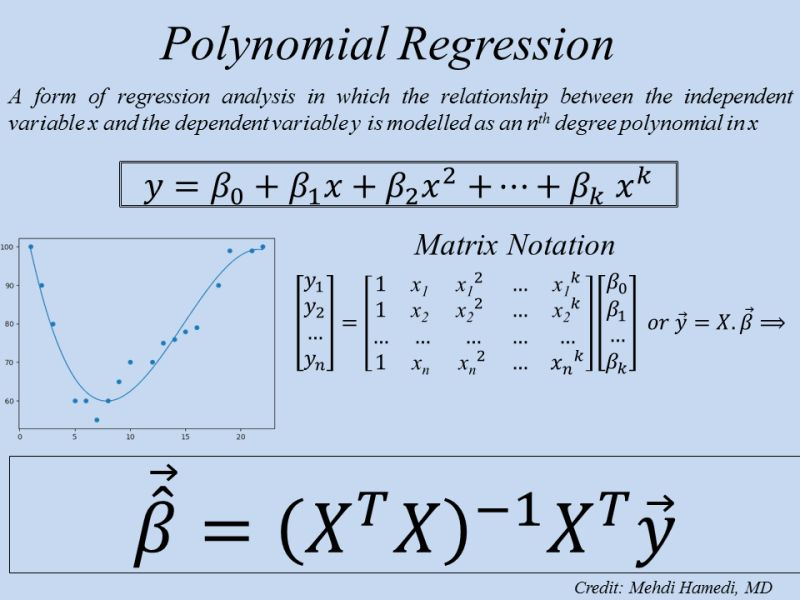

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Örnek veri (non-linear ilişki)
x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([1.2,1.9,3.0,4.8,8.5]) #Doğrusal değil

#Ploinom özelliklerini oluştur (derece 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

#Model eğit
model = LinearRegression()
model.fit(x_poly,y)

#Tahmin yap
y_pred = model.predict(x_poly)

#Sonuçlar
print("Katsayılar:",model.coef_)
print("Y-Kesişim:",model.intercept_)
print("MSE:",mean_squared_error(y,y_pred))

Katsayılar: [ 0.         -1.12142857  0.47857143]
Y-Kesişim: 1.9799999999999915
MSE: 0.04731428571428574


#  Ridge ve Lasso Regression

##  Tanım  
Ridge ve Lasso regresyonları, **aşırı öğrenme (overfitting)** sorununu azaltmak için kullanılan iki farklı **regülerleştirme (regularization)** yöntemidir.  
Bunlar, modelin karmaşıklığını kontrol ederek daha genellenebilir tahminler yapmasına yardımcı olurlar.

---

##  Ridge Regression (L2 Regularization)

###  Açıklama  
Ridge Regression, doğrusal regresyonun maliyet fonksiyonuna **L2 normu** ekleyerek ağırlıkları küçük tutmayı amaçlar. Bu, çoklu doğrusallık (multicollinearity) durumlarında oldukça faydalıdır.


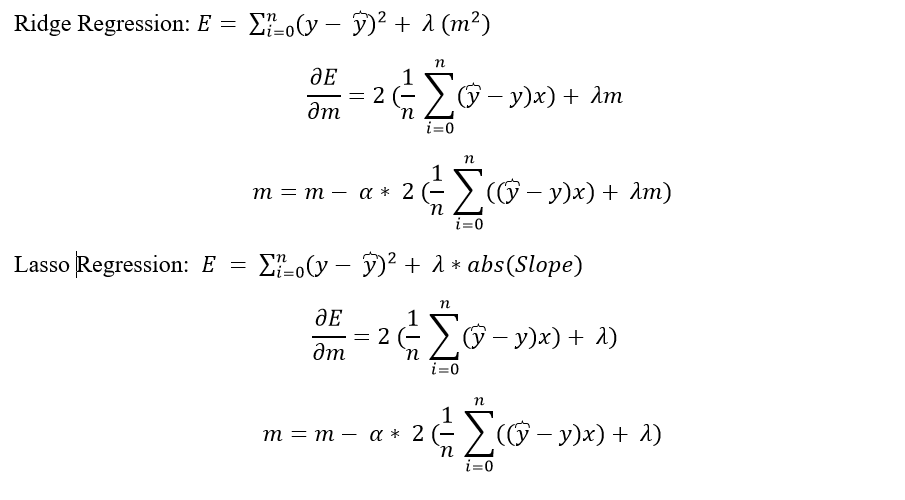

## Lasso Regression (L1 Regularization)

Lasso Regression, L1 normu ekleyerek bazı ağırlıkların tamamen sıfır olmasını sağlar. Bu sayede özellik seçimi (feature selection) de yapılmış olur

Ridge vs Lasso Karşılaştırması


Özellik	 Ridge	Lasso
Regülerizasyon türü	L2	L1
Ağırlıkları sıfırlar mı?	Hayır	Evet
Multicollinearity	İyi işler	Özellik seçimi yapar
Karmaşık veri	Genelde daha uygundur	Özellik seçiminde kullanılır


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

Ridge MSE: 0.08264999999999989
Lasso MSE: 0.03140000000000011
Ridge Katsayı: [1.23743687]
Lasso Katsayı: [1.38492424]


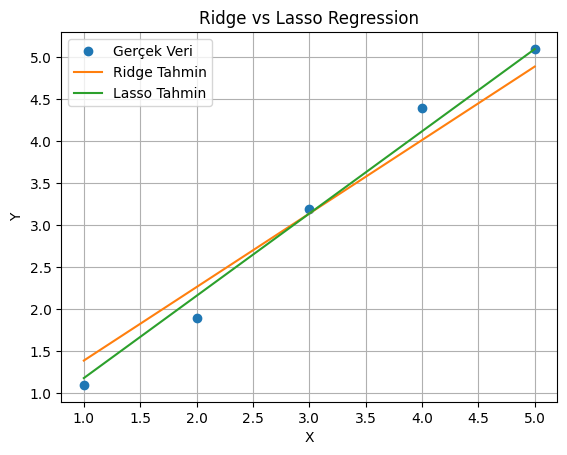

In [ ]:
#Örnek veri
x = np.array([[1],[2],[3],[4],[5]])
y = np.array([1.1,1.9,3.2,4.4,5.1])

#Özellik standardizasyonu (çok önemli)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Ridge ve Lasso Modelleri
ridge_model =Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

ridge_model.fit(x_scaled,y)
lasso_model.fit(x_scaled,y)

#Tahminler
y_ridge = ridge_model.predict(x_scaled)
y_lasso = lasso_model.predict(x_scaled)

#Hatalar
print("Ridge MSE:",mean_squared_error(y,y_ridge))
print("Lasso MSE:",mean_squared_error(y,y_lasso))

#Katsayılar
print("Ridge Katsayı:",ridge_model.coef_)
print("Lasso Katsayı:",lasso_model.coef_)

#Görselleştirme
plt.plot(x,y,'o',label='Gerçek Veri')
plt.plot(x,y_ridge,'-',label='Ridge Tahmin')
plt.plot(x,y_lasso,'-',label='Lasso Tahmin')
plt.legend()
plt.title("Ridge vs Lasso Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

#  Logistic Regression (Lojistik Regresyon)

##  Tanım  
Logistic Regression, **sınıflandırma problemleri** için kullanılan bir modeldir. Adında "regresyon" geçmesine rağmen, çıktısı **sürekli bir değer değil**, **olasılık** verir. Bu olasılığa göre örneğin hangi sınıfa ait olduğu belirlenir.

---

##  Nerede Kullanılır?  
- İkili sınıflandırma (binary classification) problemlerinde sıkça kullanılır:
  - E-posta spam mi? (Evet / Hayır)
  - Hasta kanser mi? (Evet / Hayır)
  - Müşteri ürünü alır mı?

---

##  Matematiksel Temel  

###  Olasılık Tahmini  
Model, doğrusal regresyonun sonucunu **sigmoid (logistik) fonksiyonundan geçirerek** 0 ile 1 arasında bir olasılık çıktısı üretir.


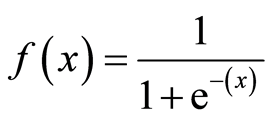

##Loss Function
Binary Cross-Entropy (Log Loss)

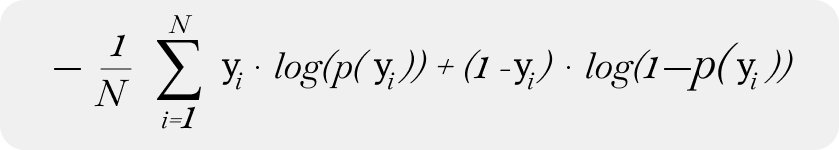

Confusion Matrix:
 [[13  0]
 [ 0  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



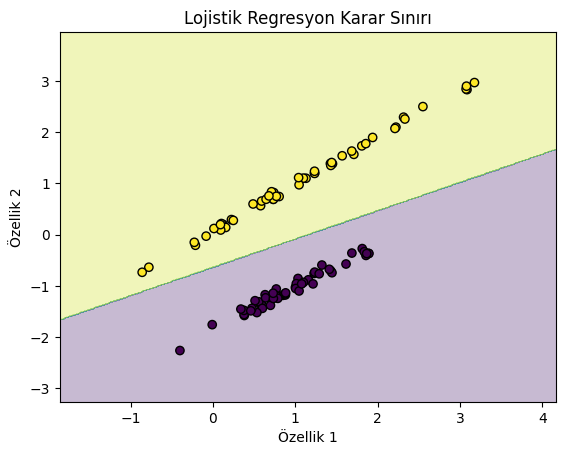

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Veri oluştur
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Değerlendirme
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Sınıflandırma sınırlarını çiz
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Özellik 1")
    plt.ylabel("Özellik 2")
    plt.title("Lojistik Regresyon Karar Sınırı")
    plt.show()

plot_decision_boundary(X, y, model)


## Avantajlar

- Kolay uygulanır, hızlı çalışır
- Olasılık çıktısı verir
- Yorumlanabilirliği yüksektir
## Dezavantajlar

- Karmaşık ilişkileri modelleyemez (doğrusal sınırlar çizer)
- Büyük veri ve çok boyutlu verilerde performansı düşebilir

## k-Nearest Neighbors (k-NN) Algoritması
### Tanım

k-Nearest Neighbors, yani k-En Yakın Komşu algoritması, hem sınıflandırma hem de regresyon problemlerinde kullanılabilen tembel öğrenme (lazy learning) yöntemlerinden biridir. Model, eğitim aşamasında herhangi bir öğrenme gerçekleştirmez. Bunun yerine, tahmin aşamasında veriyi analiz eder. Temelde, sınıflandırılmak istenen örneğin, eğitim veri kümesindeki en yakın “k” komşusuna bakarak karar verir.

### Nasıl Çalışır?

Eğitim verisi modele verilir.
Yeni bir veri örneği geldiğinde
- Bu örnek ile eğitim verisindeki tüm örnekler arasındaki mesafeler hesaplanır (genellikle Öklidyen mesafe kullanılır).
- En küçük mesafeye sahip k adet komşu seçilir.
- Bu k komşunun sınıfları sayılır ve en fazla sayıya sahip sınıf seçilen örneğin sınıfı olur.

## Euclidean Distance(Öklidyen Mesafesi)

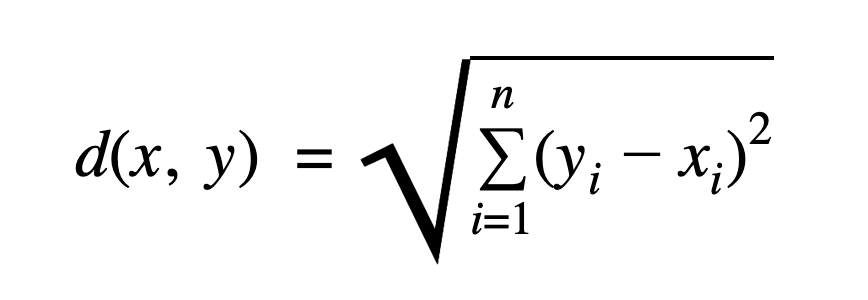

Manhattan Distance, Minkowski Distance, Hamming Distance gibi alternatifler de kullanılabilir.


## k Değeri Ne Olmalı?

- Çok küçük bir k değeri (örneğin k=1), modelin gürültüye duyarlı olmasına neden olur ve aşırı öğrenme (overfitting) riski taşır.
- Çok büyük bir k değeri ise modelin çok genelleme yapmasına neden olur ve alt öğrenme (underfitting) ortaya çıkabilir.
- Genellikle tek sayı tercih edilir (özellikle binary classification'da eşitlik durumunu önlemek için).
- k değeri, çapraz doğrulama (cross-validation) ile belirlenebilir.
## Avantajları

- Basit ve kolay uygulanabilir
- Eğitilmesi gerekmez, sadece tahmin aşamasında çalışır
- Özellikle düşük boyutlu verilerde iyi performans gösterir
## Dezavantajları

- Tahmin süresi yavaştır çünkü her tahmin için tüm eğitim seti taranır
- Büyük veri kümelerinde ve yüksek boyutlu verilerde verimsiz olabilir (Curse of Dimensionality)
Özelliklerin ölçeklendirilmesi gerekir (örneğin StandardScaler ile), aksi takdirde mesafe hesaplaması anlamlı olmaz

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix

#Veri seti yükleme
data = load_iris()
x , y = data.data,data.target

#Eğitim ve Test Verilerine ayırma
x_train , x_test,y_train ,y_test =train_test_split(x,y,test_size=0.2, random_state=42)

#Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#k-NN modelini oluşturma (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

#Eğitim
knn.fit(x_train,y_train)

#Tahmin
y_pred = knn.predict(x_test)

#Değerlendirme
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##Açıklamalar

- StandardScaler: Özelliklerin ortalamasını 0, standart sapmasını 1 yapar. Bu, mesafe temelli algoritmalar için önemlidir.
- KNeighborsClassifier: Scikit-learn'de k-NN sınıflandırıcısıdır.
- n_neighbors=3: En yakın 3 komşuya göre sınıflandırma yapılır.
- confusion_matrix ve classification_report: Modelin doğruluk, precision, recall gibi metriklerle performansını ölçer.

# Support Vector Machines (SVM)
### Tanım

Support Vector Machines, denetimli bir öğrenme algoritmasıdır ve temel amacı, sınıflar arasındaki maksimum marjini (maksimum ayrım mesafesini) sağlayan en iyi ayırma hiper düzlemini (hyperplane) bulmaktır. Bu sayede sınıflar birbirinden net bir şekilde ayrılır.

Özellikle 2 sınıflı (binary) sınıflandırma problemlerinde çok kullanılır; ancak çoklu sınıf (multiclass) destekleri de vardır.

### Temel Kavramlar

- Hyperplane: Veriyi iki sınıfa ayıran düzlem. n-boyutlu uzayda (özellik sayısına bağlı olarak) n−1 boyutlu olur. Örneğin, 2 boyutlu bir veride bu çizgi, 3 boyutlu veride ise bir düzlemdir.
- Support Vectors: Sınıfları ayıran hiper düzleme en yakın veri noktalarıdır. Bu noktalar, karar sınırını belirlemede kritik rol oynar. Modelin genel formu bu vektörlere bağlıdır.
- Margin: Sınıfların destek vektörleriyle hiper düzlem arasındaki mesafesidir. SVM, bu marjini maksimum yapmaya çalışır.
### Amaç

## Modelin amacı:

- İki sınıfı maksimum marjin ile ayıran hiper düzlemi bulmak
- Hatalı sınıflandırma yapmadan bu düzlemi yerleştirmek (Lineer ayrılabilirlik varsa)
- Lineer olarak ayrılabilir olmayan verilerde kernel trick ile veriyi daha yüksek boyutlara dönüştürerek ayırmak


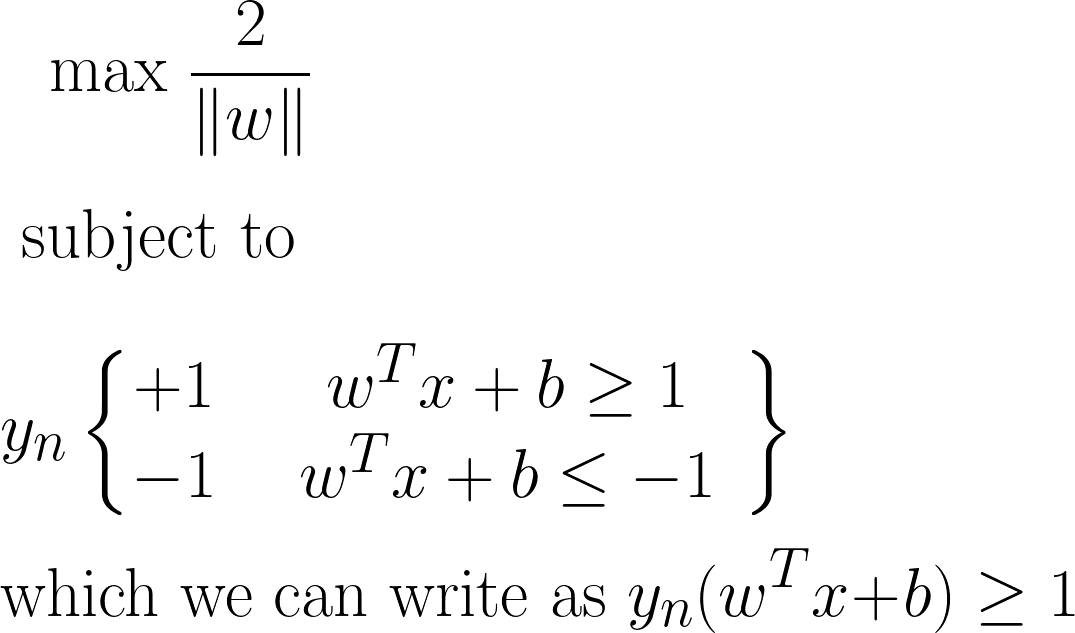

 # Kernel Trick (Çekirdek Fonksiyonları)

Veriler lineer olarak ayrılabilir değilse, SVM veriyi daha yüksek boyutlara projekte ederek ayırmayı dener. Bunu yaparken veriyi gerçekten dönüştürmez, bunun yerine bir çekirdek (kernel) fonksiyonu kullanarak dönüşmüş veriler arasındaki iç çarpımı hesaplar.

## Popüler çekirdekler:

- Linear kernel: Basit doğrusal ayırıcı
- Polynomial kernel: Çok terimli ayırma
- RBF (Radial Basis Function / Gaussian): Karmaşık, yuvarlak karar sınırları
- Sigmoid kernel: (Neural-net benzeri etki sağlar)

### Avantajları

-Yüksek doğruluk oranı
-Karmaşık sınırlarda dahi başarılı ayırıcılar
-Kernel yöntemiyle çok esnek hale getirilebilir
### Dezavantajları

- Büyük veri kümelerinde yavaş çalışabilir
- Özellik sayısı çok fazla olduğunda (high-dimensional space) dikkatli kullanılmalı
- Parametre ayarlaması (C, gamma gibi) zaman alabilir


In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

#Irıs veri seti
iris = datasets.load_iris()
x = iris.data[:, :2] # sadece 2 attributes alma grafiklendirme kolay olsun
y = iris.target

#sadece 2 class al (binary classification)
x = x[y !=2]
y = y[y !=2]

#Eğitim test ayır
x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

#standartlaştırma
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#SVM Modeli (Lineer Kernel)
model = SVC(kernel='linear',C=1.0)
model.fit(x_train,y_train)

#tahmin
y_pred = model.predict(x_test)

print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

#Karar Sınırlarını Çizme
def plot_svm_decision_boundary(x,y,model):
  h=0.02
  x_min ,x_max = x[:,0].min() -1, x[:,0].max()+1
  y_min ,y_max = x[:,1].min() -1, x[:,1].max()+1
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

  z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)

  plt.contourf(xx,yy,z,alpha=0.3)
  plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k')
  plt.xlabel("Özellik 1")
  plt.ylabel("Özellik 2")
  plt.title("SVM Karar Sınırı (Lineer)")
  plt.show()

  plot_svm_decision_boundary(x_train,y_train,model)


Confusion Matrix: 
 [[17  0]
 [ 0 13]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Decision Trees(Karar Ağaçları)
Karar ağaçları, hem sınıflandırma hem de regresyon problemleri için kullanılabilen, ağaç yapısında karar verme mekanizması kuran denetimli öğrenme algoritmalarıdır. Her düğümde (node) bir özellik (feature) üzerinde karar verilir, bu karar sonucu dallanarak alt düğümler oluşur. Yaprak düğümler (leaf nodes) ise son kararı (sınıf ya da değer) belirtir.

## Karar Ağacının Çalışma Mantığı

- Root Node (Kök Düğüm): Tüm veri setinden başlar.
- Feature Split (Özelliklere Göre Bölme): Belirli bir özelliğe göre veri ikiye ayrılır.
- Information Gain (Bilgi Kazancı) veya Gini Impurity gibi ölçütlere göre en iyi bölme seçilir.
- Recursive Bölme (Özyinelemeli): Alt kümeler için aynı işlem tekrar edilir.
- Stopping Criteria: Ağaç belirli bir derinliğe ulaştığında veya alt kümeler yeterince saf olduğunda durur.

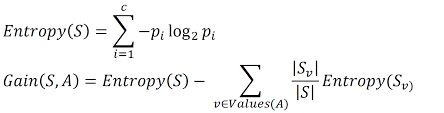

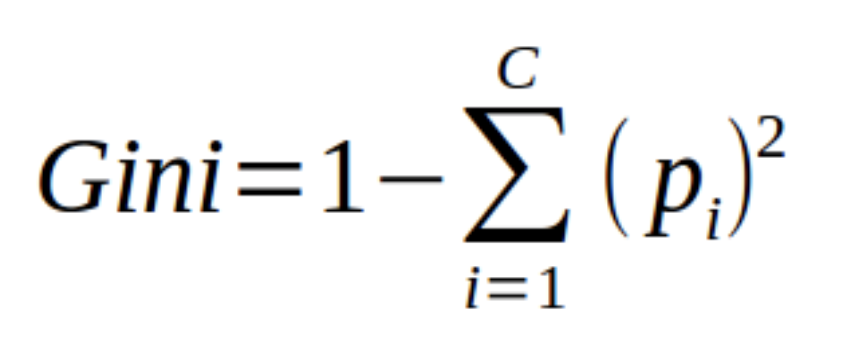

# Overfitting Problemi

Karar ağaçları tüm veriyi öğrenmeye çalıştığında aşırı karmaşık hale gelir ve overfitting yapabilir. Bunu önlemek için:

- max_depth (maksimum derinlik),
- min_samples_split (bölme için minimum örnek),
- min_samples_leaf (yaprakta minimum örnek),
- pruning (budama) gibi yöntemler kullanılır.

## Avantajları

- Yorumu kolay ve sezgiseldir
- Hem sınıflandırma hem regresyon için uygundur
- Özellik seçimi yapabilir
- Eksik verilerle başa çıkabilir (bazı versiyonlar)
## Dezavantajları

- Kolayca overfitting yapabilir
- Veri küçükse dallar hızlı büyüyebilir
- Hassas veri değişimlerinde büyük farklı karar ağaçları oluşabilir

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



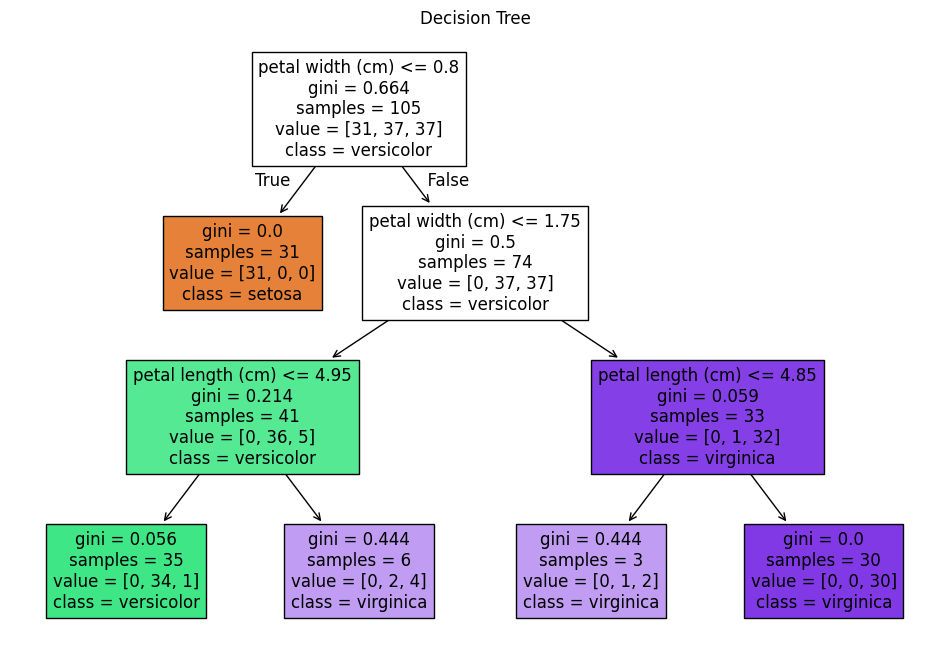

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



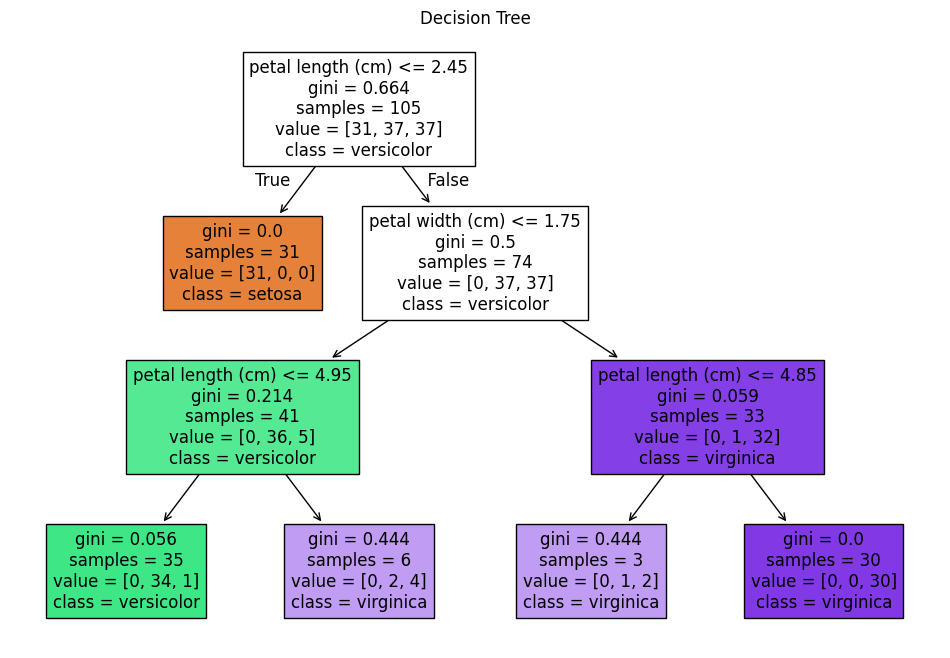

In [26]:
# Veri yükleme
iris = load_iris()
x = iris.data
y = iris.target

#Eğitim test
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#Karar ağacı modeli
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
clf.fit(x_train,y_train)

#tahmin
y_pred = clf.predict(x_test)

#performans
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree")
plt.show()


# Random Forest
Random Forest, birden fazla karar ağacının birlikte çalıştığı bir bagging (bootstrap aggregation) yöntemidir. Bu yöntem, birçok karar ağacı eğitir ve her bir ağacın çıktısına göre oylama yaparak (sınıflandırma için) veya ortalama alarak (regresyon için) nihai tahmini verir.

## Nasıl Çalışır?

- Bootstrap Sampling: Veri setinden rastgele (yerine koyarak) alt kümeler seçilir.
- Karar Ağaçları Eğitilir: Her alt küme ile ayrı bir karar ağacı eğitilir.
- Rastgele Özellik Seçimi: Her bölme için tüm özellikler yerine rastgele bir alt küme özellik seçilir.
- Tahmin: Sınıflandırma için çoğunluk oyu, regresyon için ortalama kullanılır.
## Neden Daha İyi?

- Her bir ağaç farklı veri ve özelliklerle eğitildiği için yüksek çeşitlilik elde edilir.
- Bu çeşitlilik, overfitting ihtimalini azaltır.
- Karar ağacının yüksek varyanslı yapısı Random Forest içinde stabilize edilir.
## Önemli Parametreler

- n_estimators: Kaç tane karar ağacı kullanılacak?
- max_features: Her bölme için kaç özellik değerlendirilecek?
- max_depth: Ağaçların maksimum derinliği.
- bootstrap: Örneklem alma yapılacak mı?
- random_state: Sonuçların tekrarlanabilirliği için rastgelelik sabiti.
## Avantajları

- Genellikle çok yüksek doğruluk sağlar.
- Overfitting’e karşı dayanıklıdır.
Eksik veriler, dengesiz veri setleriyle başa çıkabilir.
- Özellik önemlerini verebilir (feature_importances_).
## Dezavantajları

- Yorumlanabilirlik düşüktür (bir “black box” olabilir).
- Büyük veri setlerinde yavaş çalışabilir.
- Bellek kullanımı yüksektir.


Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Feature Importances:
 color_intensity                 0.180583
flavanoids                      0.166635
alcohol                         0.140965
proline                         0.127290
od280/od315_of_diluted_wines    0.095536
hue                             0.085764
total_phenols                   0.059040
magnesium                       0.033435
alcalinity_of_ash               0.032524
proanthocyanins                 0.031641
malic_acid                      0.028860
ash                             0.011696
nonflavanoid_phenols   

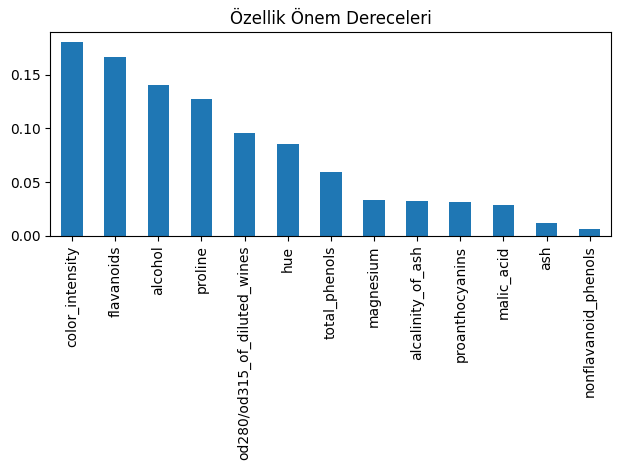

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()
x = wine.data
y = wine.target

x_train , x_test ,y_train , y_test = train_test_split(x,y, test_size=0.3, random_state=42)

#Random forest modals
rf = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
rf.fit(x_train,y_train)

#tahmin
y_pred = rf.predict(x_test)

#performans
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Özellik Önemleri
feature_importances = pd.Series(rf.feature_importances_, index=wine.feature_names).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)

# Görselleştirme
feature_importances.plot(kind='bar', title='Özellik Önem Dereceleri')
plt.tight_layout()
plt.show()

# Naive Bayes

Naive Bayes sınıflandırıcıları, Bayes Teoremine dayalı olasılıksal sınıflandırma algoritmalarıdır. “Naive” yani saf/naif denmesinin nedeni, modelin her özelliğin birbirinden bağımsız olduğunu varsaymasıdır (ki genellikle gerçek dünyada bu doğru değildir ama yine de iyi sonuç verir).

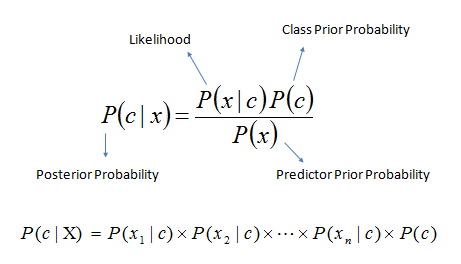

## Naive Bayes Türleri

- Gaussian Naive Bayes: Sürekli değerler için, normal dağılım varsayar.
- Multinomial Naive Bayes: Belge sınıflandırma gibi sayma (count) verileri için uygundur.
- Bernoulli Naive Bayes: Özelliklerin ikili (binary) olduğu durumlarda kullanılır.
### Avantajları

- Hızlı ve bellek dostudur.
- Az veriyle bile iyi sonuç verir.
- Özellikle metin sınıflandırmada çok güçlüdür.
- Çok sayıda özelliğe sahip yüksek boyutlu verilerle iyi başa çıkar.
### Dezavantajları

- Özelliklerin birbirinden bağımsız olduğu varsayımı genellikle geçerli değildir.
- Sürekli sayısal verilerde sınırlı performans.
- Modelin çıktısı olasılık gibi görünse de mutlak güvenilir değildir.

In [31]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Veri kümesi (iki sınıf: spor vs bilim)
categories = ['rec.sport.baseball', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Özellik çıkarımı (kelime frekansları)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Veri bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

# Değerlendirme
print(classification_report(y_test, y_pred, target_names=categories))


                    precision    recall  f1-score   support

rec.sport.baseball       1.00      1.00      1.00       286
         sci.space       1.00      1.00      1.00       309

          accuracy                           1.00       595
         macro avg       1.00      1.00      1.00       595
      weighted avg       1.00      1.00      1.00       595



# Gradient Boosting (Gradyan Artırmalı Ağaçlar)
### Temel Fikir

Gradient Boosting, zayıf öğrenicilerin (genelde karar ağaçları) hatalarını üst üste öğrenerek güçlü bir model haline gelmesini sağlayan bir topluluk yöntemidir. Her bir yeni model, önceki modellerin yapamadığı kısımlara odaklanarak öğrenme yapar.

### Boosting vs Bagging

- Bagging (Random Forest): Paralel olarak bağımsız modeller oluşturur.
- Boosting (Gradient Boosting): Modeller sıralı olarak oluşturulur ve her yeni model, öncekinin hatasını düzeltmeye çalışır.
### Nasıl Çalışır?

- İlk model (örneğin bir karar ağacı), veri setine uygulanır ve tahmin hataları hesaplanır.
- İkinci model, bu hataları öğrenmeye çalışır.
Bu işlem, belirli sayıda iterasyon boyunca sürer.
- Her adımda öğrenilen model, uygun bir ağırlıkla toplama eklenir.
- Nihai tahmin, tüm bu modellerin ağırlıklı toplamıdır.
## Popüler Gradient Boosting Kütüphaneleri
### 1. XGBoost (Extreme Gradient Boosting)

-Hızlıdır ve eksik verilerle başa çıkabilir.
-Regularization (L1, L2) içerir → overfitting’i azaltır.
-Paralel işlemeye uygundur.
### 2. LightGBM (Light Gradient Boosting Machine)

- Çok büyük veri setleri için optimize edilmiştir.
- Özellikleri histogramlara bölerek işlem yapar (daha az bellek).
- Dikey bölme (leaf-wise) stratejisi sayesinde daha derin öğrenme yapabilir.
### 3. CatBoost

- Kategorik değişkenleri otomatik işler (encoding gerekmez).
- Overfitting’e karşı dayanıklı.
Kullanımı kolay ve yüksek doğruluk sağlar.
## Önemli Parametreler
- n_estimators: Kaç adet zayıf model (ağaç) kullanılacak?
learning_rate: Her adımda ne kadar öğrenilecek?
- max_depth: Ağaçların derinliği (aşırı uyuma karşı dikkatli olunmalı).
- subsample: Her ağaç için kullanılacak örnek oranı.
- colsample_bytree: Her ağaçta kullanılacak özellik oranı.
- early_stopping_rounds: Overfitting’i önlemek için erken durdurma.

In [32]:
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Veri seti
data = load_breast_cancer()
X = data.data
y = data.target

# Eğitim ve test verisi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

# Değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:54:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Ne Zaman Gradient Boosting Kullanmalıyım?
- Model doğruluğu çok önemliyse (örneğin medikal teşhis, finansal tahmin).
- Karmaşık, doğrusal olmayan ilişkiler varsa.
- Veride eksikler ve kategorik değişkenler fazlaysa.
- Aşırı uyuma karşı önlemler gerekiyorsa (XGBoost, CatBoost bu konuda iyidir).

#Model Değerlendirme Metrikleri

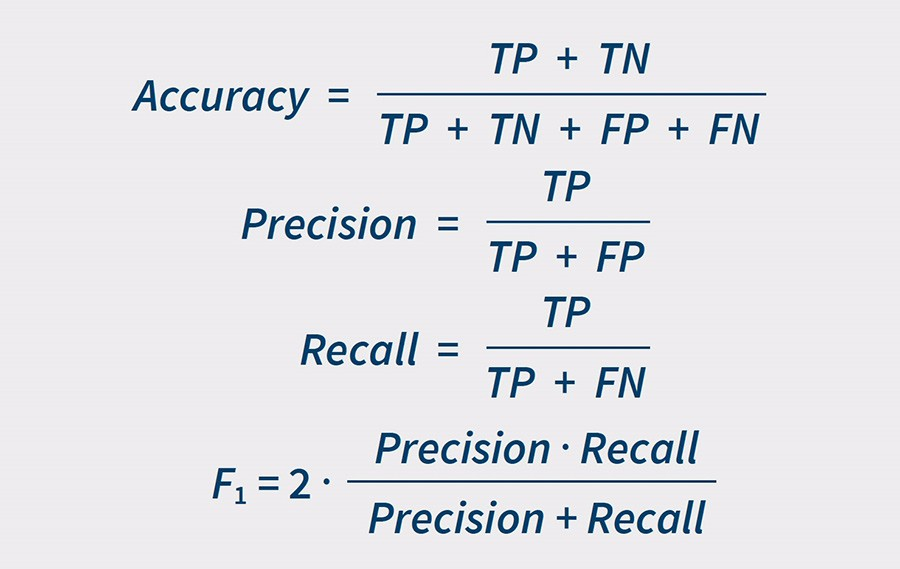

## 1. Accuracy (Doğruluk)
Modelin toplam doğru tahminlerinin, tüm tahminlere oranıdır.


- Avantajı: Veri dengeliyse iyi bir metriktir.
- Dezavantajı: Dengesiz veri setlerinde yanıltıcı olabilir. Örneğin, %95’i negatif olan veride hep "negatif" tahmin eden model %95 accuracy elde eder ama anlamsızdır.

## 2. Precision (Kesinlik)
Modelin pozitif olarak tahmin ettiği örneklerden kaçı gerçekten pozitiftir?

Kullanım: Yanlış pozitiflerin maliyetli olduğu durumlar (örneğin spam filtreleme, tıbbi teşhis).

## 3. Recall (Duyarlılık / Sensitivity / TPR)
Gerçek pozitiflerin kaç tanesi model tarafından doğru tahmin edilmiştir?

Kullanım: Yanlış negatiflerin önemli olduğu durumlar (örneğin kanser taraması).

## 4. F1-Score
Precision ve Recall’un harmonik ortalamasıdır. Dengesiz veri setlerinde daha iyi bir metriktir.

Kullanım: Hem precision hem recall önemliyse.

## 5. Confusion Matrix (Karmaşıklık Matrisi)
Modelin hangi sınıflarda ne kadar başarılı olduğunu tablo şeklinde gösterir.

TP: Gerçek pozitif → doğru tahmin
TN: Gerçek negatif → doğru tahmin
FP: Yanlış pozitif (False Alarm)
FN: Yanlış negatif (Kaçırılan)

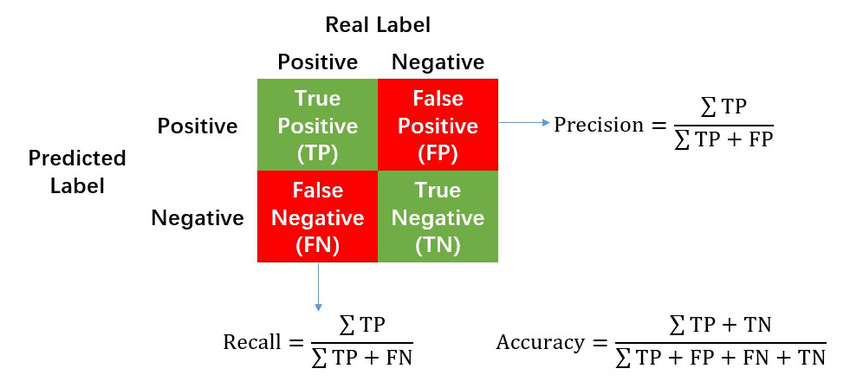

 ## 6. ROC Curve ve AUC (Receiver Operating Characteristic)
ROC eğrisi, True Positive Rate (Recall) ile False Positive Rate’in grafiğidir. Modelin sınıflandırma eşiği değiştikçe nasıl performans gösterdiğini gösterir.


AUC (Area Under the Curve): ROC eğrisinin altında kalan alan. 0.5: rastgele tahmin, 1.0: mükemmel model.

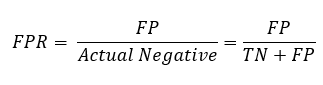

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-Score: 0.8
Confusion Matrix:
 [[4 1]
 [1 4]]


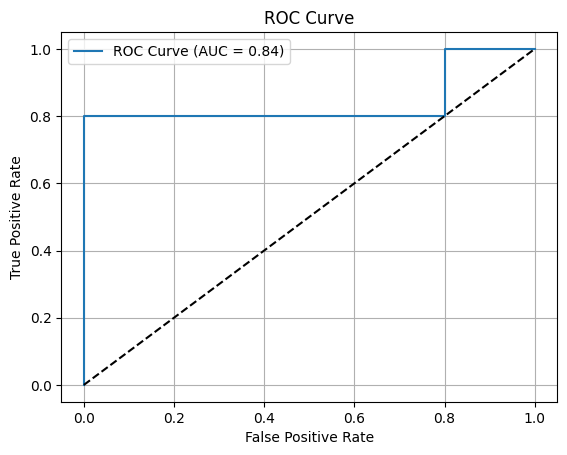

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen değerler
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [0, 1, 1, 0, 0, 0, 0, 1, 1, 1]

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1-Score:", f1_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ROC Curve
y_scores = [0.1, 0.8, 0.9, 0.4, 0.2, 0.3, 0.3, 0.9, 0.95, 0.7]  # Tahmin olasılıkları
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Bu değerlendirme metrikleri sayesinde modelin sadece doğruluğunu değil, nerelerde hata yaptığını ve bu hataların önemini anlayabiliriz.